# INERZIA ELICOTTERO

## RACCOLTA DATI

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata, decimal_val, final_val

import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'elicottero.csv'
fr = pd.read_csv(FILE)

alfa1 = np.array(fr['Alfa1']) # lista rad/s^2
sigma_alfa1 = np.std(alfa1)
sigma_alfa1_media = sigma_alfa1/np.sqrt(len(alfa1))
w = np.array(fr['sigmaAlfa1'])
alfa1 = np.average(alfa1, weights=1/w**2)

alfa2 = np.array(fr['Alfa2']) # lista rad/s^2
sigma_alfa2 = np.std(alfa2)
sigma_alfa2_media = sigma_alfa2/np.sqrt(len(alfa2))
w = np.array(fr['sigmaAlfa2'])
alfa2 = np.average(alfa2, weights=1/w**2)

alfa3 = np.array(fr['Alfa3']) # lista deg/s^2
sigma_alfa3 = np.std(alfa3)
sigma_alfa3_media = sigma_alfa3/np.sqrt(len(alfa3))
w = np.array(fr['sigmaAlfa3'])
alfa3 = np.average(alfa3, weights=1/w**2)

m = np.array([50,70,85]) * 0.001
alfa = np.array([alfa1,alfa2,alfa3]) # gr/s^2
raggio = 0.01 # m
alfa = (alfa/180) * np.pi # rad/s^2
sigma_alfa = np.array([sigma_alfa1_media,sigma_alfa2_media,sigma_alfa3_media])
sigma_alfa = (sigma_alfa/180)*np.pi #rad/s^2

m_asta = 0.026 #Kg massa asta
m_pesi = 0.08 #Kg massa singolo peso
l = 0.38 # m lunghezza asta
D = (l-0.02)/2 # m distanza del centro di massa dei pesi dall'asse di rotazione

## ANALISI DATI

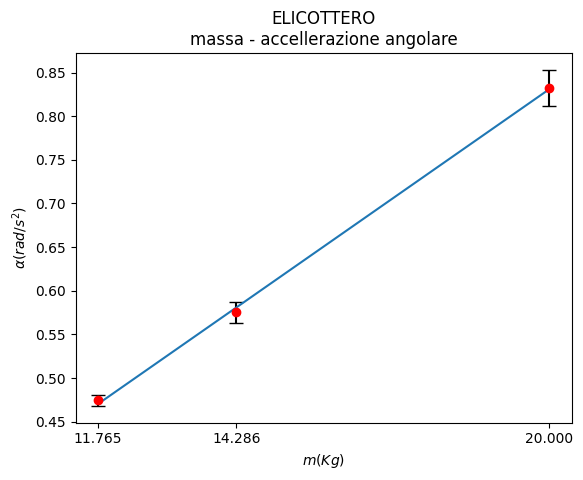


linearità A + BX
    
A: -0.04449249518091307 
B: 0.04376449064220296
sigmaA: 0.01843371737314392
sigmaB: 0.0011717318818589113

sigmaY: 0.006992160943263388
chiquadro ridotto: 0.0001
df: 1.5
    



In [18]:
r = RettaInterpolata(1/m, 1/alfa)
plt.errorbar(1/m,1/alfa,yerr=sigma_alfa,fmt='o',color='red',ecolor='black',capsize=5)
plt.plot(r.x_best,r.y_best)
plt.xticks(1/m)
plt.title("ELICOTTERO\nmassa - accellerazione angolare")
plt.ylabel("$\\alpha (rad/s^2)$")
plt.xlabel("$m (Kg)$")
plt.show()

print(r)

### inerzia attesa

$I = I_{asta} + 2I_{pesi} = \frac{1}{12}m_{asta}l^2_{asta} + 2m_{pesi}D^2$

In [19]:
I_asta = (1/12)*m_asta * (l**2)
I_pesi = 2 * m_pesi * (D**2)
I = I_asta + I_pesi
print("Inerzia attesa elicottero: ",decimal_val(I,exp=-4))

Inerzia attesa elicottero:  54.97e-4 


### inerzia misurata:

$I\alpha = mgr \Rightarrow I = \frac{mgr}{\alpha}$

$\alpha \propto m \Rightarrow \alpha = \frac{gr}{I} m$

$B = \frac{gr}{I} \Rightarrow I =  \frac{gr}{B}$

In [20]:
I = 9.8 * raggio * r.B
sigmaI =  9.8 * raggio * r.sigmaB # i sigmaB sono 3

print('Inerzia misurata elicottero: ',final_val(I,sigmaI,exp=-4))

Inerzia misurata elicottero:  (42.89 ± 1.15)e-4 
